In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import urllib.request as requests
import os
import sys
import json
import urllib
from tqdm import tqdm
from scipy.spatial import distance
import numbers
import math
from tqdm import tqdm
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas import Series

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# !apt -qq -y install fonts-nanum

In [5]:
#폰트 적용
#폰트의 실제 위치 : /usr/share/fonts/truetype/nanum/*.ttf
# /usr/share/fonts/truetype/nanum
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname = path, size = 10 )
font.get_name()

plt.rc('font', family= font.get_name())
mpl.font_manager._rebuild()

In [6]:
df_result = pd.read_csv('/content/drive/My Drive/프로젝트/data/real/result2!.csv')
gu_all = pd.read_csv('/content/drive/My Drive/프로젝트/data/real/gu_all.csv')

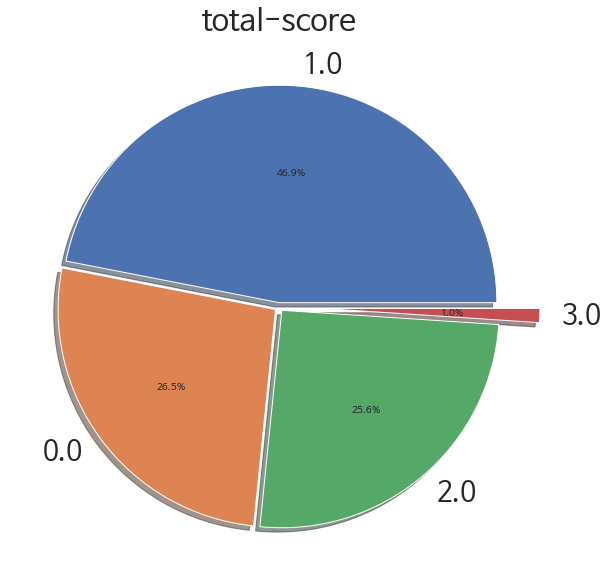

In [7]:
f = plt.figure(figsize=(10,10))
df_result.total.value_counts().plot.pie(explode =[0.02,0.02,0.02,0.2], autopct='%1.1f%%',shadow=True)
plt.title(f'total-score')
plt.ylabel('')
plt.show()

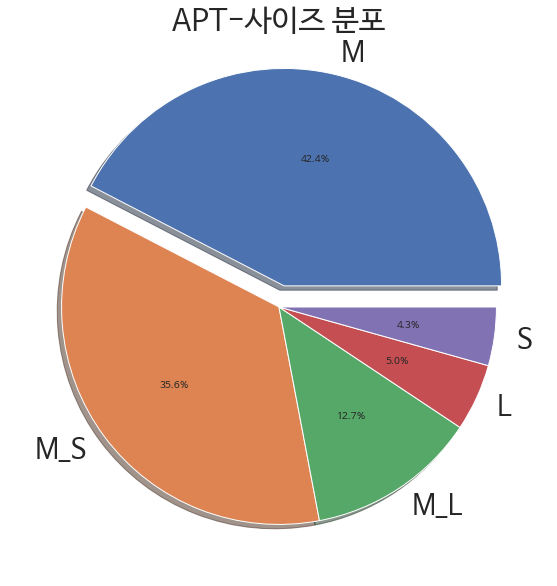

In [8]:
f = plt.figure(figsize=(10,10))
df_result.apt_size.value_counts().plot.pie( explode =[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.title(f'APT-사이즈 분포')
plt.ylabel('')
plt.show()

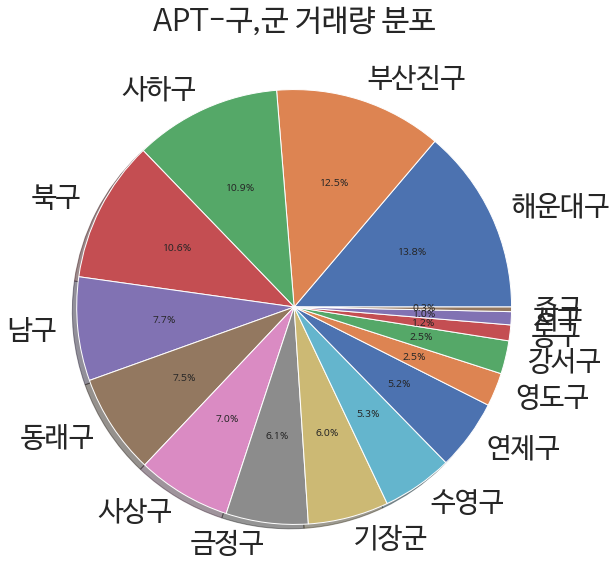

In [14]:
f = plt.figure(figsize=(10,10))
df_result.gu_y.value_counts().plot.pie( autopct='%1.1f%%',shadow=True)
plt.title('APT-구,군 거래량 분포')
plt.ylabel('')
plt.show()

In [17]:
del df_result['Unnamed: 0']

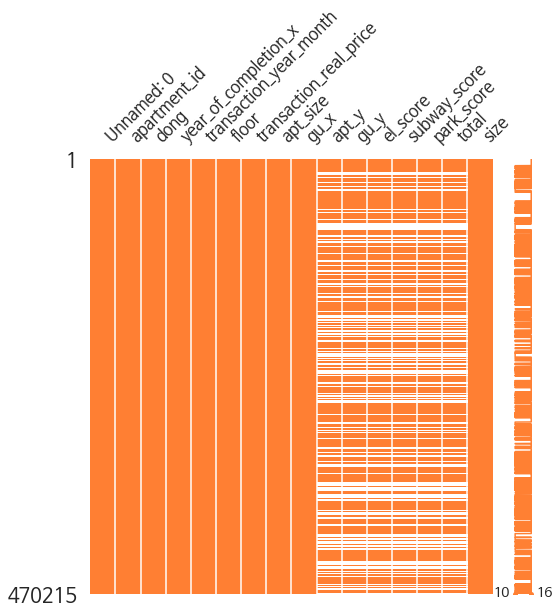

In [11]:
# null data 분포도   null은 빌라, 주택  아파트가 아니므로 제거
msno.matrix(df=df_result.iloc[:, :] , figsize=(8,8), color = ( 1, 0.5 , 0.2))


In [91]:
df_result2 = df_result.dropna(axis = 0)

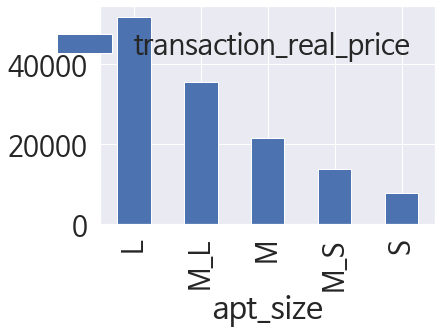

In [92]:
#아파트 사이즈에 따른 평균 가격
df_result2[['apt_size', 'transaction_real_price']].groupby(['apt_size'], as_index=True).mean().sort_values(by='transaction_real_price', ascending=False).plot.bar()
plt.show()

In [93]:
tmp = df_result2['gu_y'].unique()

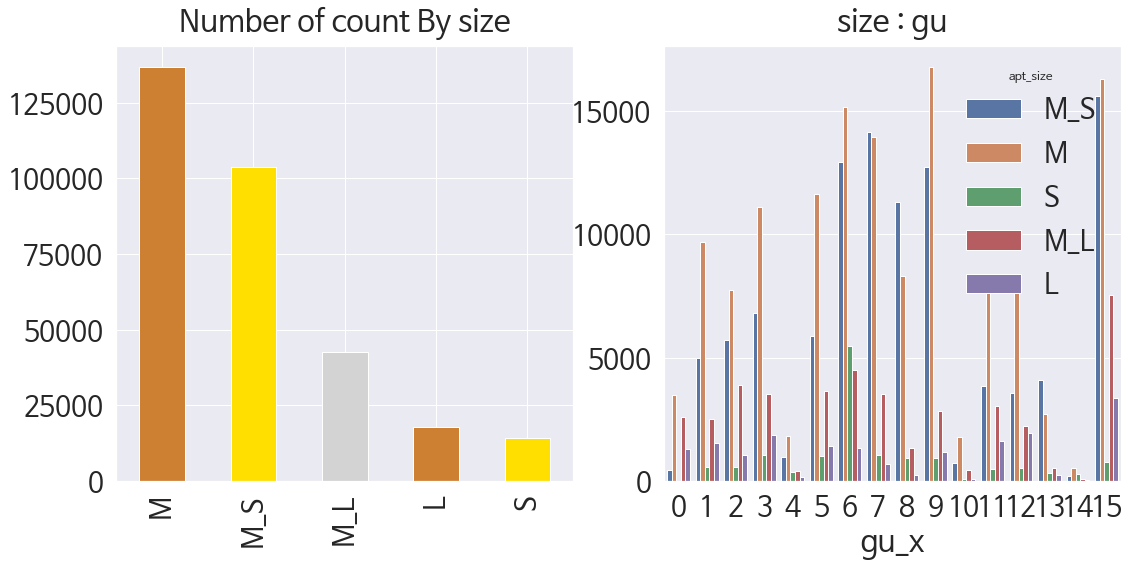

In [94]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_result2['apt_size'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of count By size', y=y_position)
ax[0].set_ylabel('')
sns.countplot('gu_x', hue= 'apt_size' , data =df_result2, ax=ax[1])
ax[1].set_title('size : gu', y=y_position)
ax[1].set_ylabel('')


plt.show()

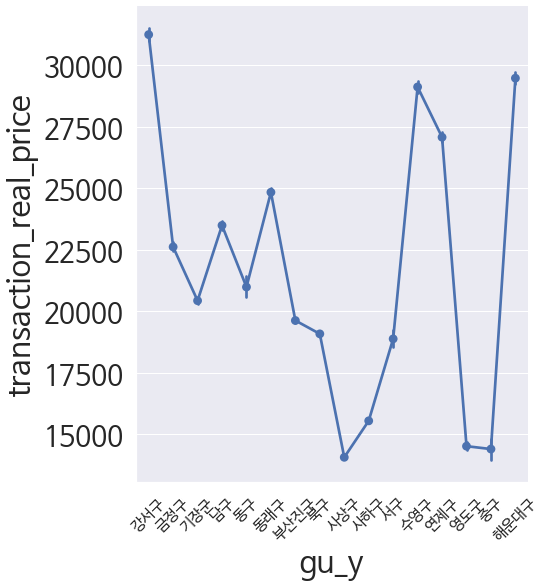

In [95]:
b = sns.factorplot('gu_y', 'transaction_real_price', data= df_result2, size=8, aspect=1)
b.set_xticklabels(size = 15, rotation= 45)
plt.show()
# gu = ['gangsugu','gumjunggu','gijang','namgu','donggu','dongraegu','busanjingu','buggu','sasanggu','sahagu','sugu','suyoung',
#       'yeonjaegu','youngdogu','joonggu','haewoondae']

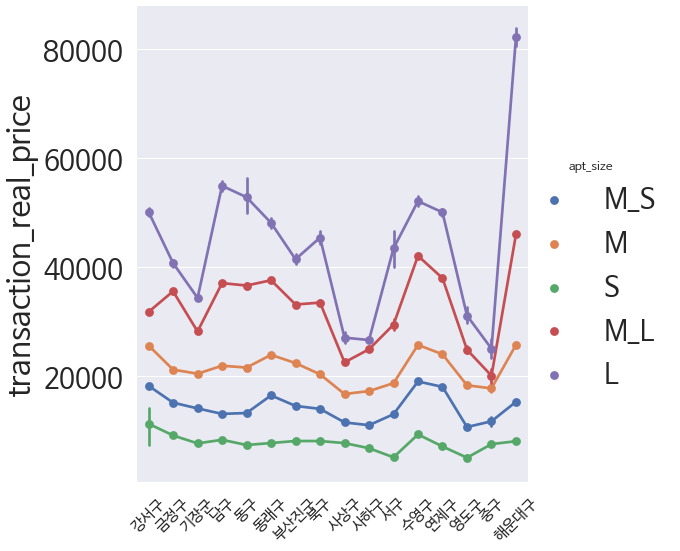

In [96]:
# 사이즈별 구에 따른 평균가격
b =sns.factorplot('gu_y', 'transaction_real_price', data= df_result2, hue= 'apt_size', size=8, aspect=1)
b.set_xticklabels(size = 15, rotation= 45)
b.set_xlabels('')
plt.show()


In [97]:
df_result2[df_result2.gu_y == '강서구'].transaction_real_price.mean()

31253.519075144508

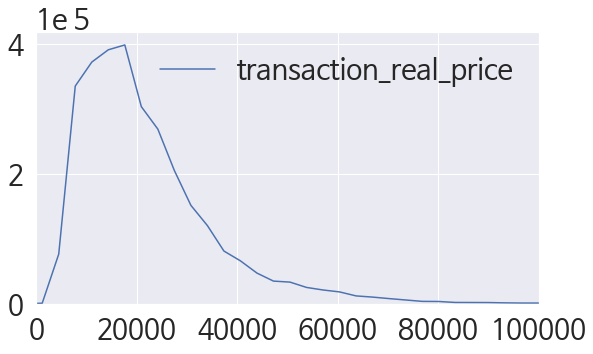

In [98]:
fig, ax = plt.subplots(1,1, figsize= (9,5))

sns.kdeplot(df_result2['transaction_real_price'], ax=ax)

plt.xlim(0, 100000)
plt.show()
#  사이즈별 거래가 가장 많이 이뤄지는 분포

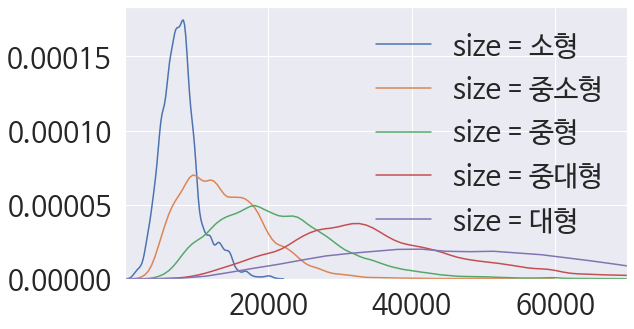

In [99]:
fig, ax = plt.subplots(1,1, figsize= (9,5))
sns.kdeplot(df_result2[(df_result2['apt_size'] == 'S')]['transaction_real_price'], ax=ax)
sns.kdeplot(df_result2[(df_result2['apt_size'] == 'M_S')]['transaction_real_price'], ax=ax)
sns.kdeplot(df_result2[(df_result2['apt_size'] == 'M')]['transaction_real_price'], ax=ax)
sns.kdeplot(df_result2[(df_result2['apt_size'] == 'M_L')]['transaction_real_price'], ax=ax)
sns.kdeplot(df_result2[(df_result2['apt_size'] == 'L')]['transaction_real_price'], ax=ax)

plt.legend(['size = 소형', 'size = 중소형', 'size = 중형', 'size = 중대형', 'size = 대형'])
plt.xlim(1,70000)
plt.show()
#  사이즈별 거래가 가장 많이 이뤄지는 분포

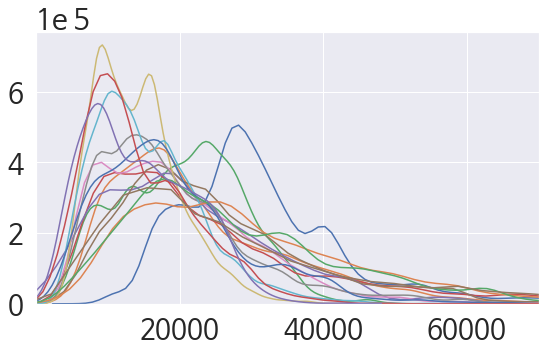

In [100]:
fig, ax = plt.subplots(1,1, figsize= (9,5))
sns.kdeplot(df_result2[(df_result2['gu_x'] == 0)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 1)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 2)]['transaction_real_price'], ax=ax,legend = False)  # 4등
sns.kdeplot(df_result2[(df_result2['gu_x'] == 3)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 4)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 5)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 6)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 7)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 8)]['transaction_real_price'], ax=ax,legend = False) # 상위
sns.kdeplot(df_result2[(df_result2['gu_x'] == 9)]['transaction_real_price'], ax=ax,legend = False)  #  상위
sns.kdeplot(df_result2[(df_result2['gu_x'] == 10)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 11)]['transaction_real_price'], ax=ax,legend = False)
sns.kdeplot(df_result2[(df_result2['gu_x'] == 12)]['transaction_real_price'], ax=ax,legend = False) 
sns.kdeplot(df_result2[(df_result2['gu_x'] == 13)]['transaction_real_price'], ax=ax,legend = False) 
sns.kdeplot(df_result2[(df_result2['gu_x'] == 14)]['transaction_real_price'], ax=ax,legend = False)  #일등
sns.kdeplot(df_result2[(df_result2['gu_x'] == 15)]['transaction_real_price'], ax=ax,legend = False) 


plt.xlim(1,70000)
plt.show()
# 거래가 가장 많이 이뤄지는 분포
# 해운대구가  구평균 거래금액중 가장 높다는것이 뚜렷하게 나타남을 보여줌 

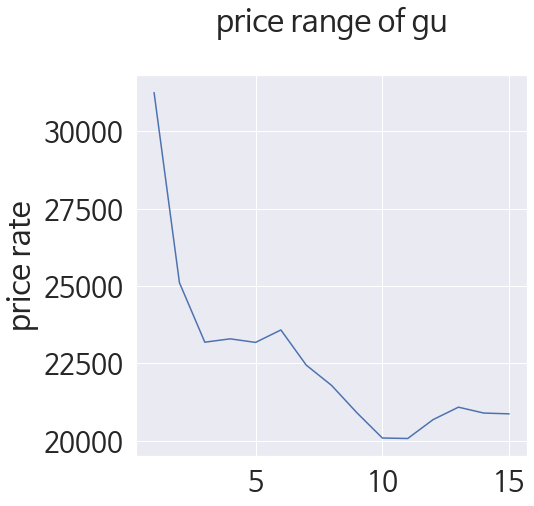

In [101]:
change_gu_range_price_ratio = []

for i in range(0, 16):
    change_gu_range_price_ratio.append(df_result2[df_result2['gu_x'] < i]['transaction_real_price'].sum() / len(df_result2[df_result2['gu_x'] < i ]['transaction_real_price']))

plt.figure(figsize=(7,7))
plt.plot(change_gu_range_price_ratio)
plt.title('price range of gu', y= 1.1)
plt.ylabel('price rate')
plt.show()

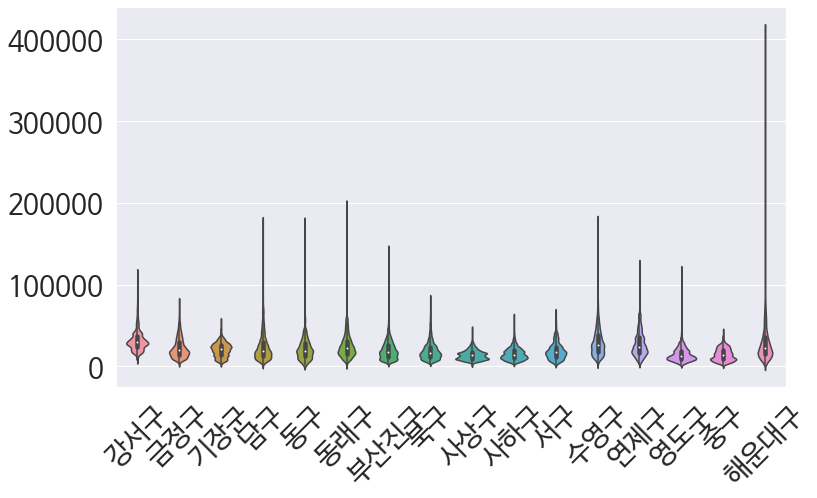

In [102]:
plt.figure(figsize=(12,7))
ax = sns.violinplot(data=df_result2, x="gu_y", y="transaction_real_price",size=8, aspect=1)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.show()

# 구별 가격분포

#해운대구에서 이상치를 확인할 수 있다.


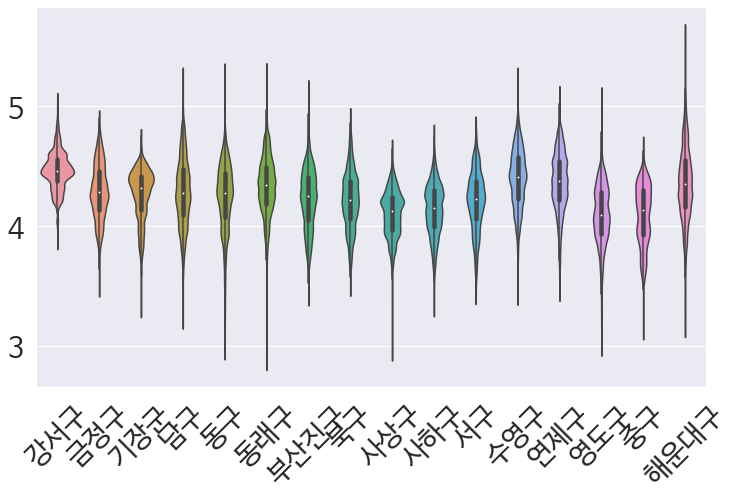

In [103]:
df_result2['log_price'] = np.log10(df_result2[['transaction_real_price']])
plt.figure(figsize=(12,7))
ax = sns.violinplot(data=df_result2, x="gu_y", y="log_price")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.show()
plt.show()

# 구별 가격분포 정규화
# 정규화를 함으로써 아파트의 금액상승비율은 강서구를 제외하고 구마다 크게 상이하지 않다.
# 강서구는 상승 비율이 상대적으로 낫다고 볼 수 있다.


(0.0, 100000.0)

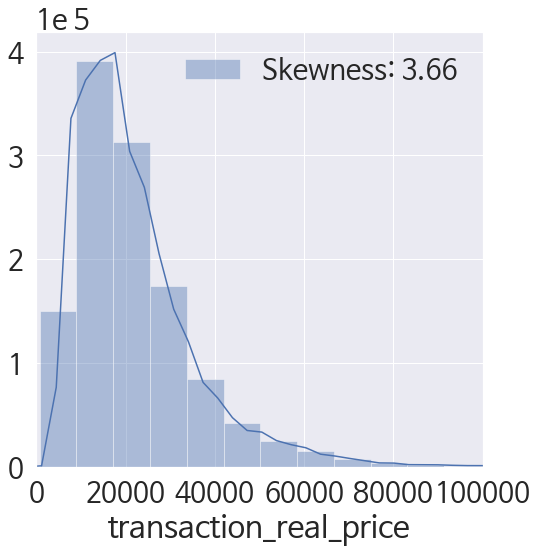

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_result2['transaction_real_price'], color='b', label = 'Skewness: {:.2f}'.format(df_result2['transaction_real_price'].skew()), ax=ax)
g = g.legend(loc = 'best')
plt.xlim(0,100000)
#왜도가 0이면 대칭(정규분포)
#왜도 가 왼쪽으로 기울었다(비대칭) 왼쪽으로 기울어 오른쪽으로 긴꼬리를 가짐 왜도는 양수이다
# 왜도가 +2이상으로 거래가 1~3억 가격에 거래량이 밀집되어있음을 통계학적으로 의미있다고 볼 수 있다.

In [105]:
df_result3 = df_result2.reset_index(drop=True )
df_result3.columns

Index(['apartment_id', 'dong', 'year_of_completion_x',
       'transaction_year_month', 'floor', 'transaction_real_price', 'apt_size',
       'gu_x', 'apt_y', 'gu_y', 'el_score', 'subway_score', 'park_score',
       'total', 'size', 'log_price'],
      dtype='object')

In [106]:
heatmap_data = df_result3[['transaction_real_price', 'transaction_year_month', 'floor', 'year_of_completion_x', 'size', 'gu_x', 'total']]
print(heatmap_data)

        transaction_real_price  transaction_year_month  ...  gu_x  total
0                        16897                    2016  ...     0    0.0
1                        19000                    2016  ...     0    0.0
2                        17600                    2016  ...     0    0.0
3                        21200                    2016  ...     0    0.0
4                        17043                    2016  ...     0    0.0
...                        ...                     ...  ...   ...    ...
315472                    4900                    2010  ...    15    2.0
315473                    4000                    2009  ...    15    2.0
315474                    6500                    2011  ...    15    2.0
315475                    6300                    2011  ...    15    2.0
315476                    7500                    2014  ...    15    2.0

[315477 rows x 7 columns]


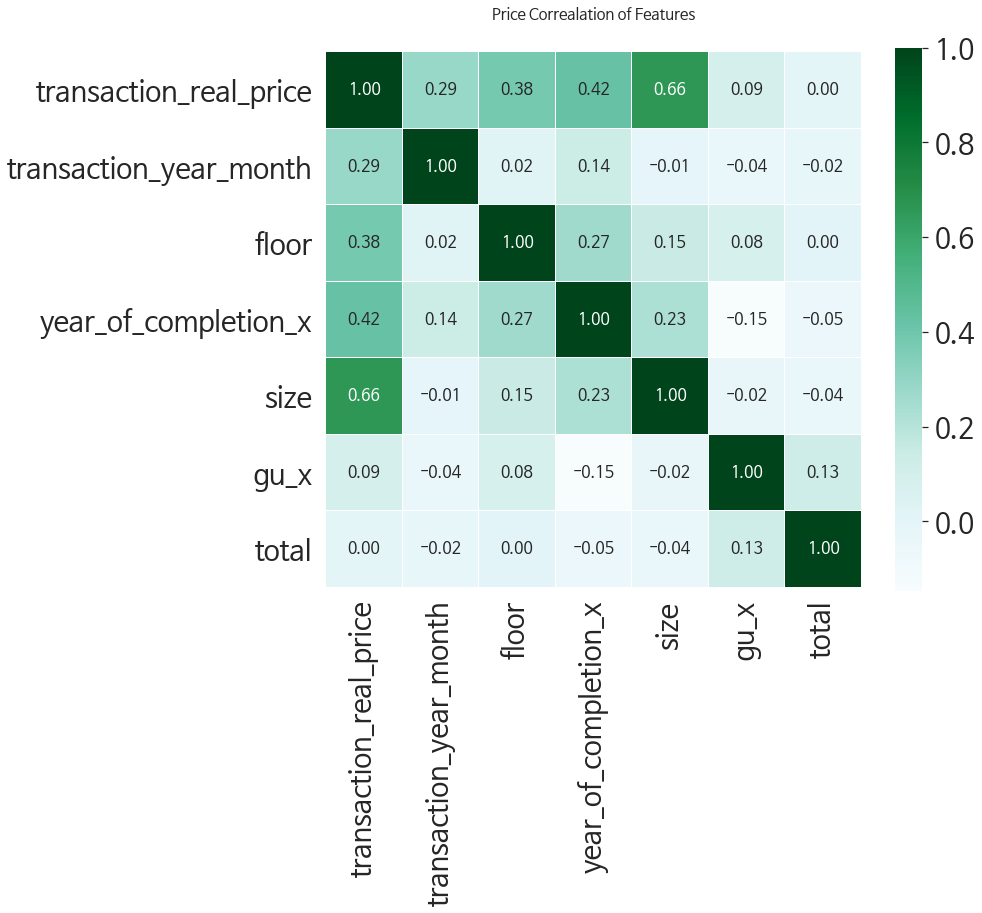

In [107]:
colormap = plt.cm.BuGn
plt.figure(figsize = (12, 10))
plt.title('Price Correalation of Features', y=1.05 , size = 15)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1 , vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True , annot_kws={'size': 16}, fmt='.2f')
plt.show()

In [108]:
# '중동', '좌동', '재송동', '우동', '송정동', '반여동', '반송동'
df_result3['dong_x'] = df_result3['dong'].map({'중동': 0, '좌동': 1, '재송동': 2, '우동': 3, '송정동': 4, '반여동': 5, '반송동': 6})

In [109]:
# 해운대구 상관분석
heatmap_data = df_result3[df_result3.gu_y == '해운대구'][['transaction_real_price', 'transaction_year_month', 'floor', 'year_of_completion_x', 'size', 'dong_x', 'total']]
print(heatmap_data)

        transaction_real_price  transaction_year_month  ...  dong_x  total
271957                   13000                    2011  ...     0.0    1.0
271958                   13000                    2011  ...     0.0    1.0
271959                    9500                    2010  ...     0.0    1.0
271960                   11500                    2009  ...     0.0    1.0
271961                   13500                    2008  ...     0.0    1.0
...                        ...                     ...  ...     ...    ...
315472                    4900                    2010  ...     6.0    2.0
315473                    4000                    2009  ...     6.0    2.0
315474                    6500                    2011  ...     6.0    2.0
315475                    6300                    2011  ...     6.0    2.0
315476                    7500                    2014  ...     6.0    2.0

[43520 rows x 7 columns]


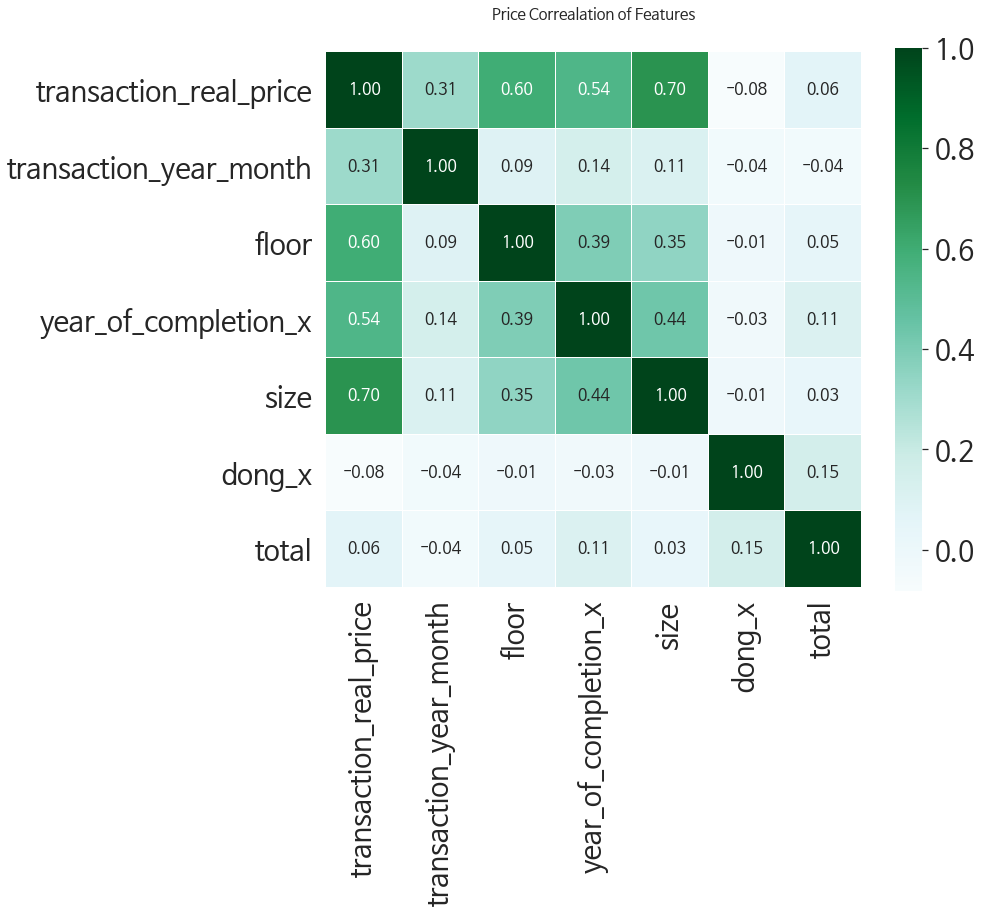

In [110]:
colormap = plt.cm.BuGn
plt.figure(figsize = (12, 10))
plt.title('Price Correalation of Features', y=1.05 , size = 15)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1 , vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True , annot_kws={'size': 16}, fmt='.2f')
plt.show()

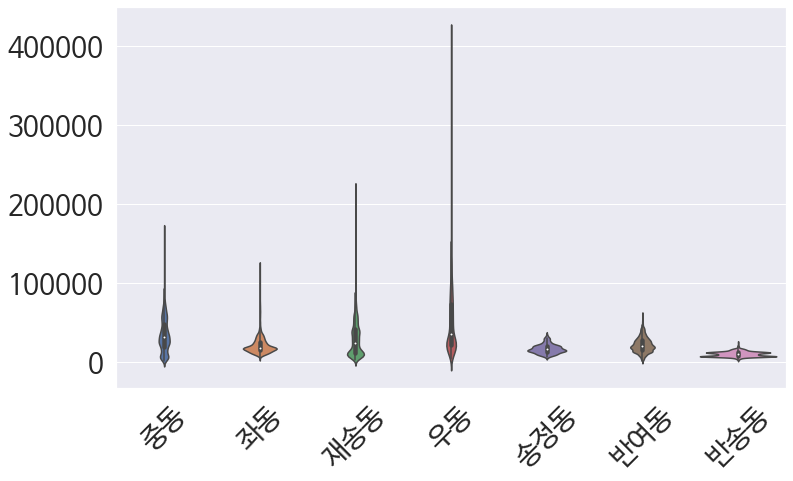

In [111]:
plt.figure(figsize=(12,7))
ax = sns.violinplot(data=df_result3[df_result3.gu_y == '해운대구'], x="dong", y="transaction_real_price")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.show()

#  우동의 가격이 앞도적으로 높게 나옴


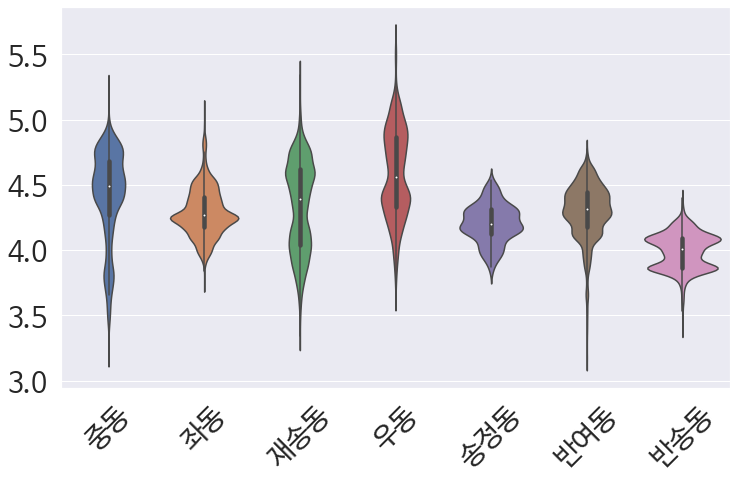

In [112]:
plt.figure(figsize=(12,7))
ax = sns.violinplot(data=df_result3[df_result3.gu_y == '해운대구'], x="dong", y="log_price")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.show()


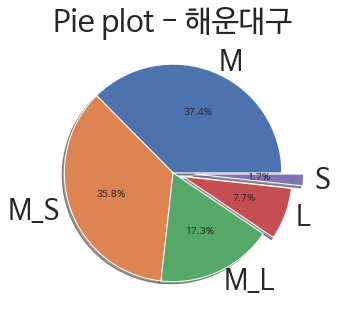

In [113]:
# f, ax = plt.subplots(16,5, figsize =(6,6))
f = plt.figure(figsize=(8,5))
df_result3[df_result3.gu_y == '해운대구']['apt_size'].value_counts().plot.pie(explode=[0,0,0,0.1,0.2], autopct='%1.1f%%',shadow=True)
plt.title('Pie plot - 해운대구')
plt.ylabel('')
plt.show()

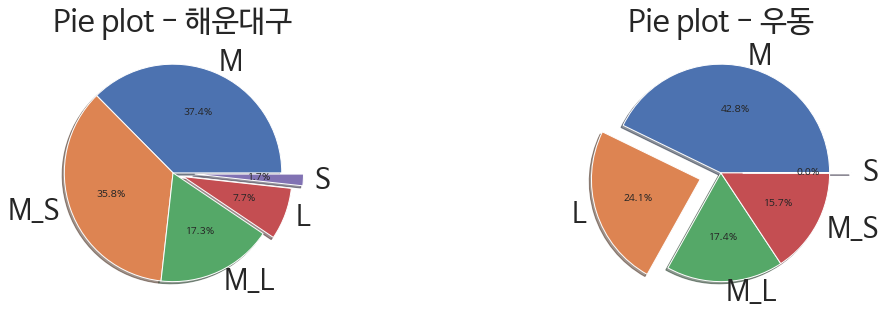

In [114]:
f, ax = plt.subplots(1,2, figsize =(18,5))

df_result3[df_result3.gu_y == '해운대구']['apt_size'].value_counts().plot.pie(explode=[0,0,0,0.1,0.2], autopct='%1.1f%%',shadow=True, ax=ax[0])
ax[0].set_title('Pie plot - 해운대구')
ax[0].set_ylabel('')
df_result3[df_result3.dong == '우동']['apt_size'].value_counts().plot.pie(explode=[0,0.2,0,0,0.2], autopct='%1.1f%%',shadow=True, ax=ax[1])
ax[1].set_title('Pie plot - 우동')
ax[1].set_ylabel('')
plt.show(f)

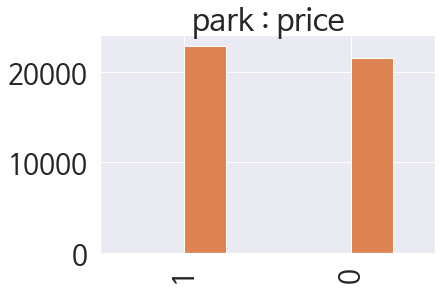

In [115]:
#스코어 점수에 따른 평균 실거래가격
df_result3[['park_score', 'transaction_real_price']].groupby(['park_score'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=False).plot.bar(legend = False)
plt.title('park : price')
plt.ylabel('')
plt.show()
# 공원이 300m 이내에 있는경우가 평균가격이 조금더 높다 

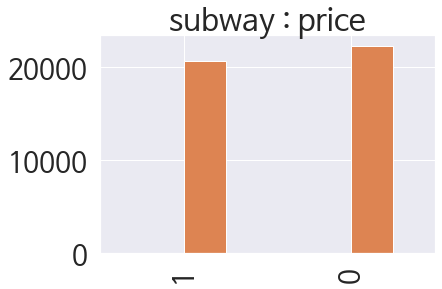

In [116]:
df_result3#스코어 점수에 따른 평균 실거래가격
df_result3[['subway_score', 'transaction_real_price']].groupby(['subway_score'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=True).plot.bar(legend = False)
plt.title('subway : price')
plt.ylabel('')
plt.show()
# 지하철이 가까이 있을수록 낮다.

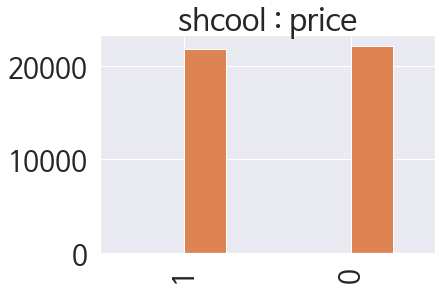

In [117]:
df_result3#스코어 점수에 따른 평균 실거래가격
df_result3[['el_score', 'transaction_real_price']].groupby(['el_score'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=True).plot.bar(legend = False)
plt.title('shcool : price')
plt.ylabel('')
plt.show()
# 무의미 하다.

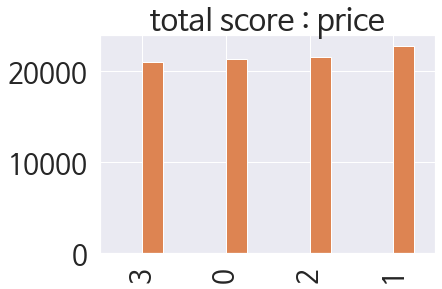

In [125]:
df_result3#스코어 점수에 따른 평균 실거래가격
df_result3[['total', 'transaction_real_price']].groupby(['total'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=True).plot.bar(legend = False)
plt.title('total score : price')
plt.ylabel('')
plt.show()
# 점수가 3점일때 가장낮으며 1점일때 가장 높은점수.

In [126]:
# 스코어 상관분석
heatmap_data = df_result3[['transaction_real_price',  'park_score', 'subway_score', 'el_score', 'total']]
print(heatmap_data)

        transaction_real_price  park_score  subway_score  el_score  total
0                        16897         0.0           0.0       0.0    0.0
1                        19000         0.0           0.0       0.0    0.0
2                        17600         0.0           0.0       0.0    0.0
3                        21200         0.0           0.0       0.0    0.0
4                        17043         0.0           0.0       0.0    0.0
...                        ...         ...           ...       ...    ...
315472                    4900         1.0           0.0       1.0    2.0
315473                    4000         1.0           0.0       1.0    2.0
315474                    6500         1.0           0.0       1.0    2.0
315475                    6300         1.0           0.0       1.0    2.0
315476                    7500         1.0           0.0       1.0    2.0

[315477 rows x 5 columns]


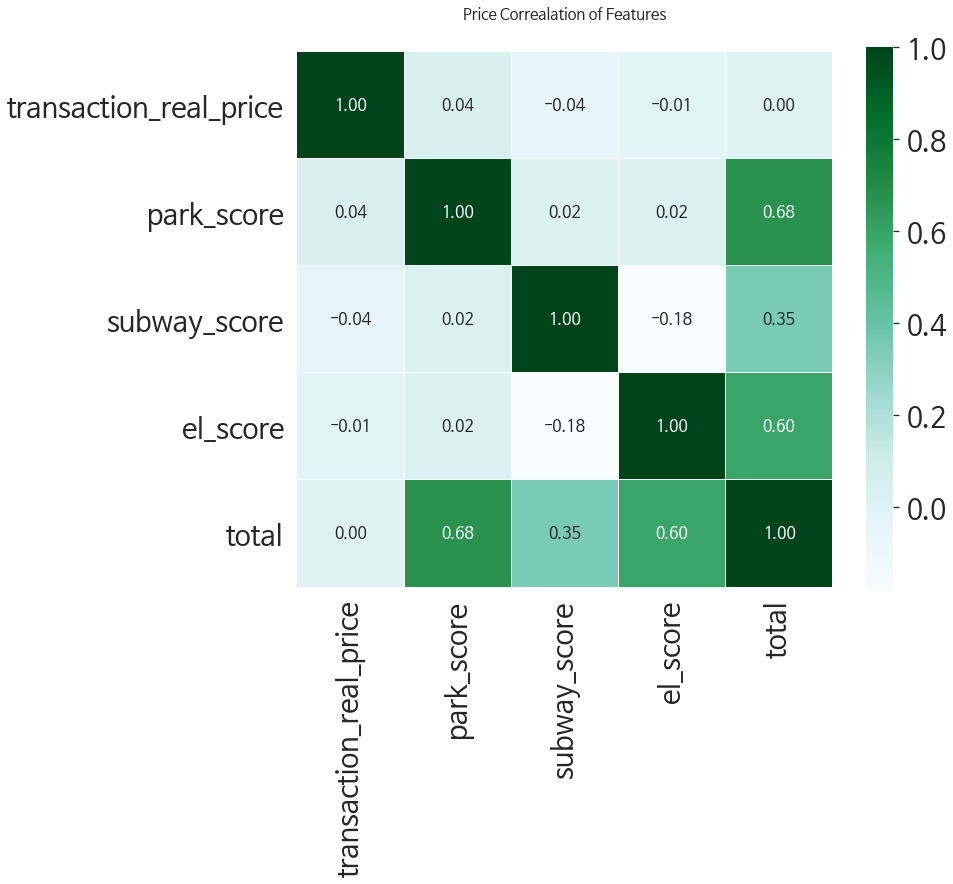

In [127]:
colormap = plt.cm.BuGn
plt.figure(figsize = (12, 10))
plt.title('Price Correalation of Features', y=1.05 , size = 15)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1 , vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True , annot_kws={'size': 16}, fmt='.2f')
plt.show()

In [128]:
# 스코어 수정 상관분석
heatmap_data2= df_result3[['transaction_real_price',  'park_score', 'subway_score', 'total']]

In [129]:
heatmap_data2['subway_score']= heatmap_data2['subway_score'].map({0 : 1, 1:0})

In [130]:
heatmap_data2['total'] = heatmap_data2[['park_score','subway_score']].T.sum()

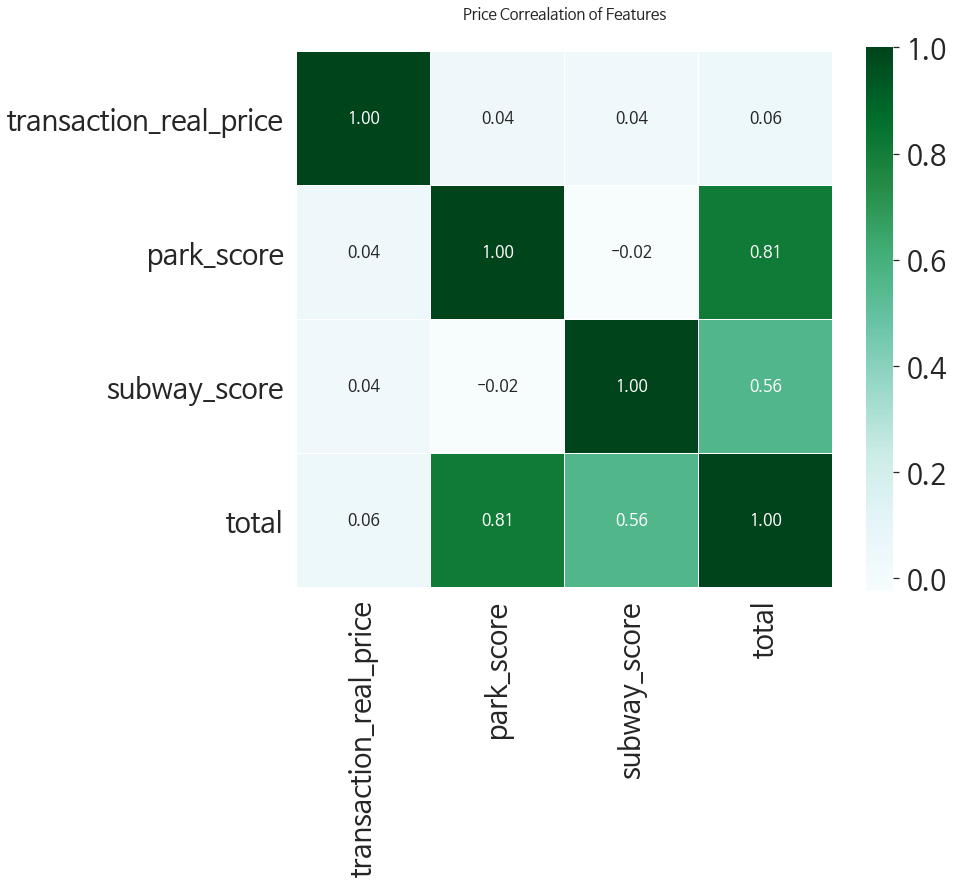

In [131]:
colormap = plt.cm.BuGn
plt.figure(figsize = (12, 10))
plt.title('Price Correalation of Features', y=1.05 , size = 15)
sns.heatmap(heatmap_data2.corr(), linewidths = 0.1 , vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True , annot_kws={'size': 16}, fmt='.2f')
plt.show()

In [56]:
sns.pairplot(heatmap_data)
plt.show()

KeyboardInterrupt: ignored

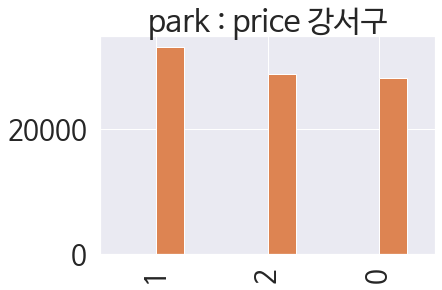

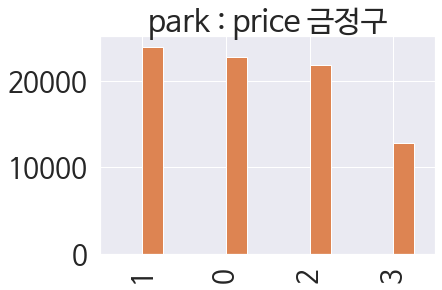

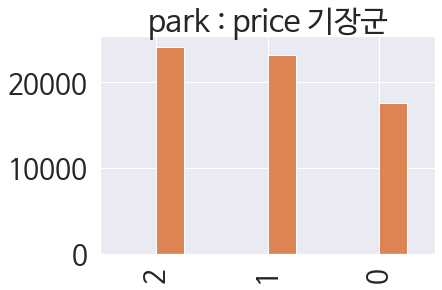

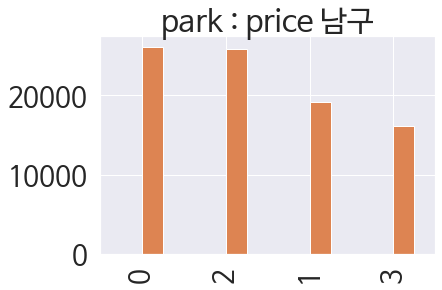

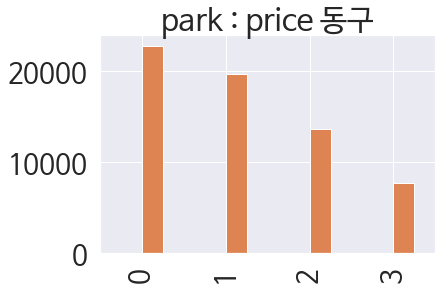

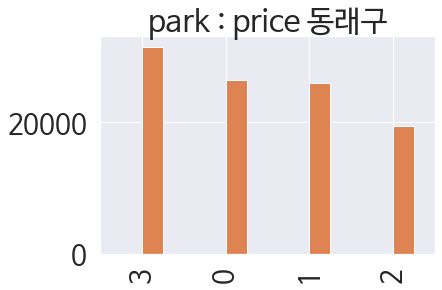

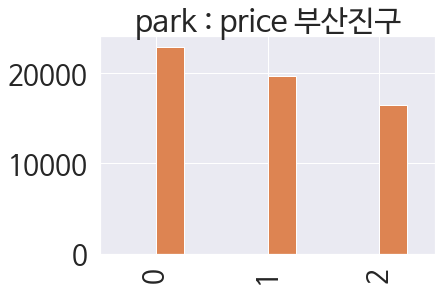

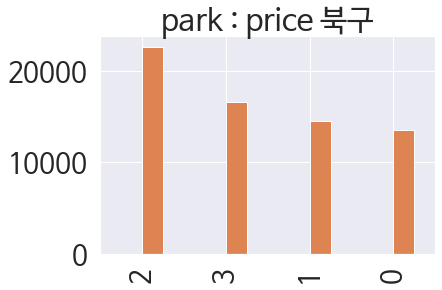

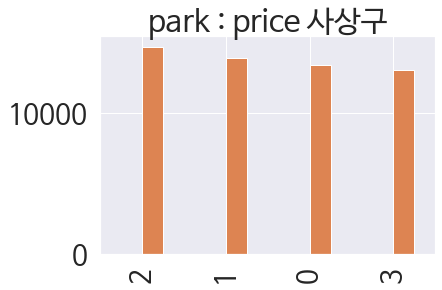

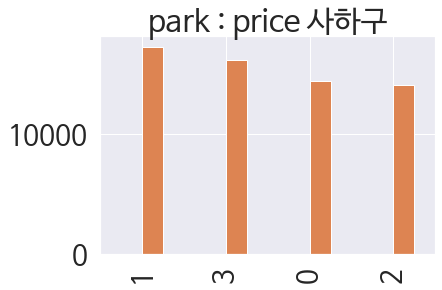

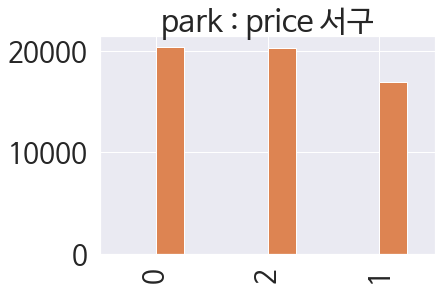

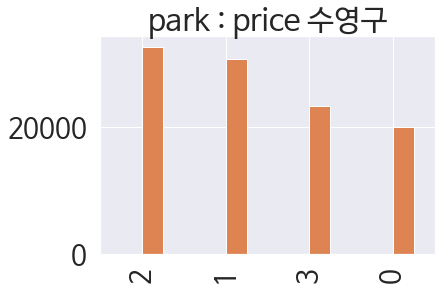

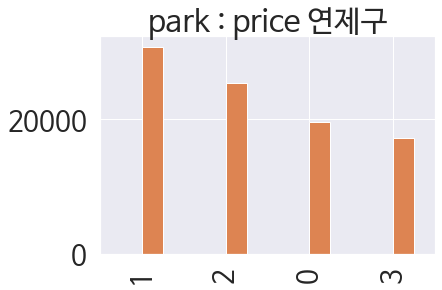

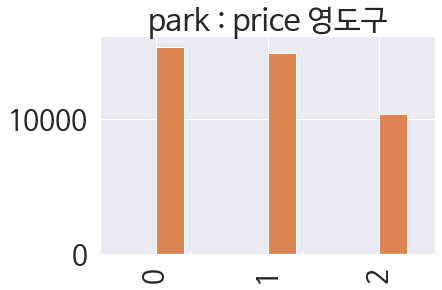

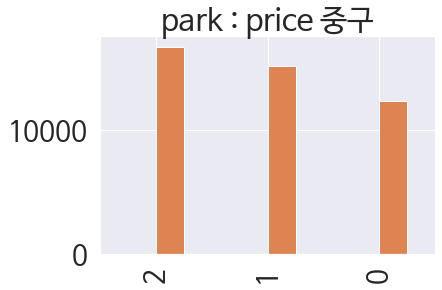

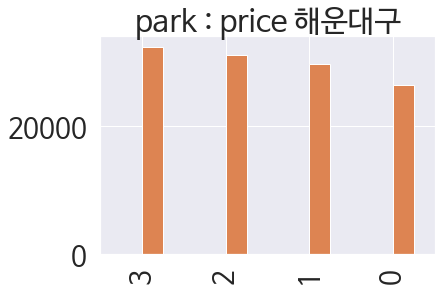

In [132]:
#구별 스코어 점수에 따른 평균 실거래가격
for i in df_result3.gu_y.unique():
  df_result2[df_result2.gu_y == f'{i}'][['total', 'transaction_real_price']].groupby(['total'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=False).plot.bar(legend = False)
  plt.title(f'park : price {i}')
  plt.ylabel('')
  plt.show()
# 초등학교 근처 지역  강서구, 금정구 ,기장군 , 동래구,수영구,중구!  / 남구, 동구!,진구,북구!, 서구!,연제구,해운대,영도
# 공원  근처 지역     기장군, 북구!,사상구,수영구,해운대구         /강서구!, 금정구,남구, ,동구! ,동래구, 부산진,영도구!,중구
# 지하철 근처 지역     기장군,동구,서구!,연제구,중구, 해운대구!    /금정구, 남구 ,동래구!,북구,사상구 ,사하구 ,수영구

# 기장군 점수 높을수록 가격이 높다.
# 남군느 점수가 낮을수록 가격이 높다.
# 동구!! 낮을수록 진구도
# 해운대구 높을수록 가격 높다

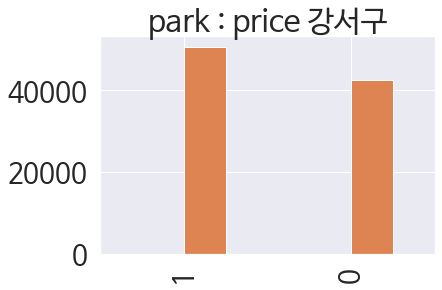

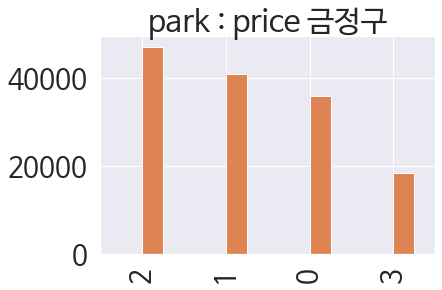

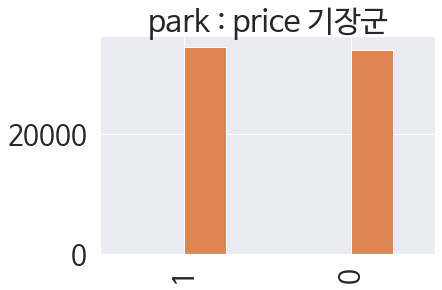

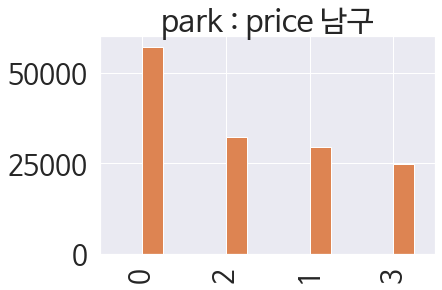

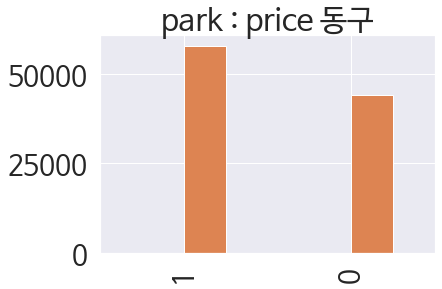

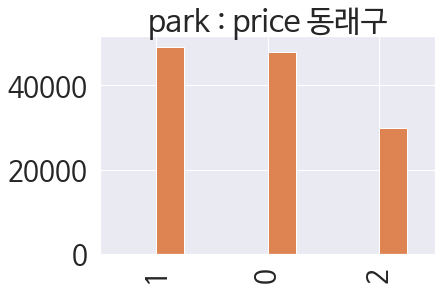

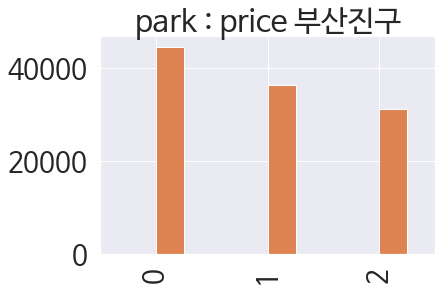

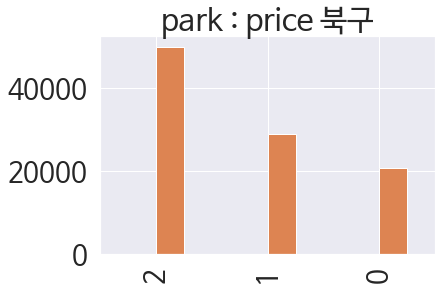

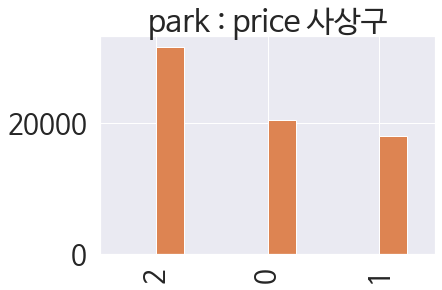

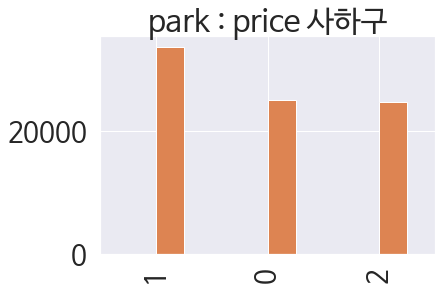

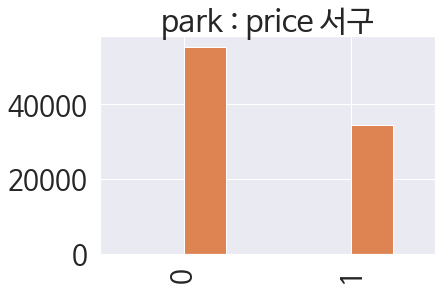

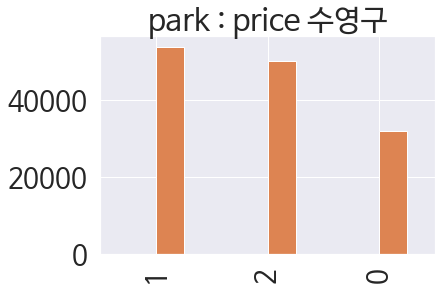

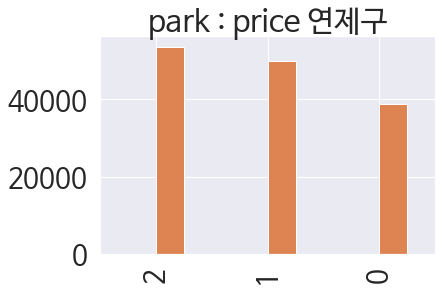

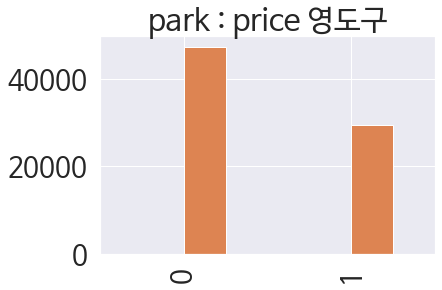

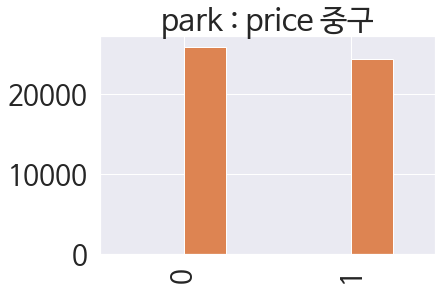

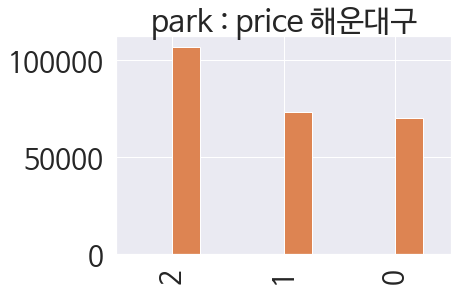

In [133]:
for i in df_result3.gu_y.unique():
  df_result2[(df_result2['gu_y'] == f'{i}') & (df_result2['size'] == 4)][['total', 'transaction_real_price']].groupby(['total'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=False).plot.bar(legend = False)
  plt.title(f'park : price {i}')
  plt.ylabel('')
  plt.show()

# 대형아파트는 점수에 높음에 따라 가격이 높은 경향이 있음.

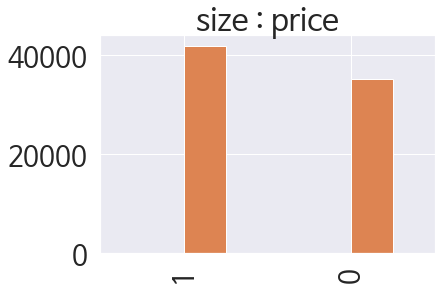

In [135]:

df_result2[(df_result2['gu_y'] == '동구') & (df_result2['size'] == 3)][['total', 'transaction_real_price']].groupby(['total'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=False).plot.bar(legend = False)
plt.title('size : price')
plt.ylabel('')
plt.show()

# 해운대구 대형아파트는 점수에 높음에 따라 가격이 높은 경향이 있음.
# 기장군은 중소형아파트에 점수가 높음에 따라 가격이 높은 경향이 있다.
# 동구는 중형아파트가 점수가 높음에 따라 가격이 낮은 경향이 있다.
# 남구의 대형아파트는 점수가 높을수록 가격이 낮다

In [136]:
# tmp['subway_score']= df_result3['subway_score'].map({0 : 1, 1:0})
tmp = df_result3.drop('el_score',axis = 1)

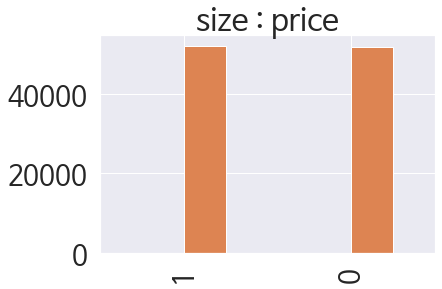

In [137]:

df_result3[ (df_result3['size'] == 4)][['el_score', 'transaction_real_price']].groupby(['el_score'], as_index=False).mean().sort_values(by='transaction_real_price', ascending=False).plot.bar(legend = False)
plt.title('size : price')
plt.ylabel('')
plt.show()

# 대형아파트는 공원에 따라 가격이 높은 경향이 있음.

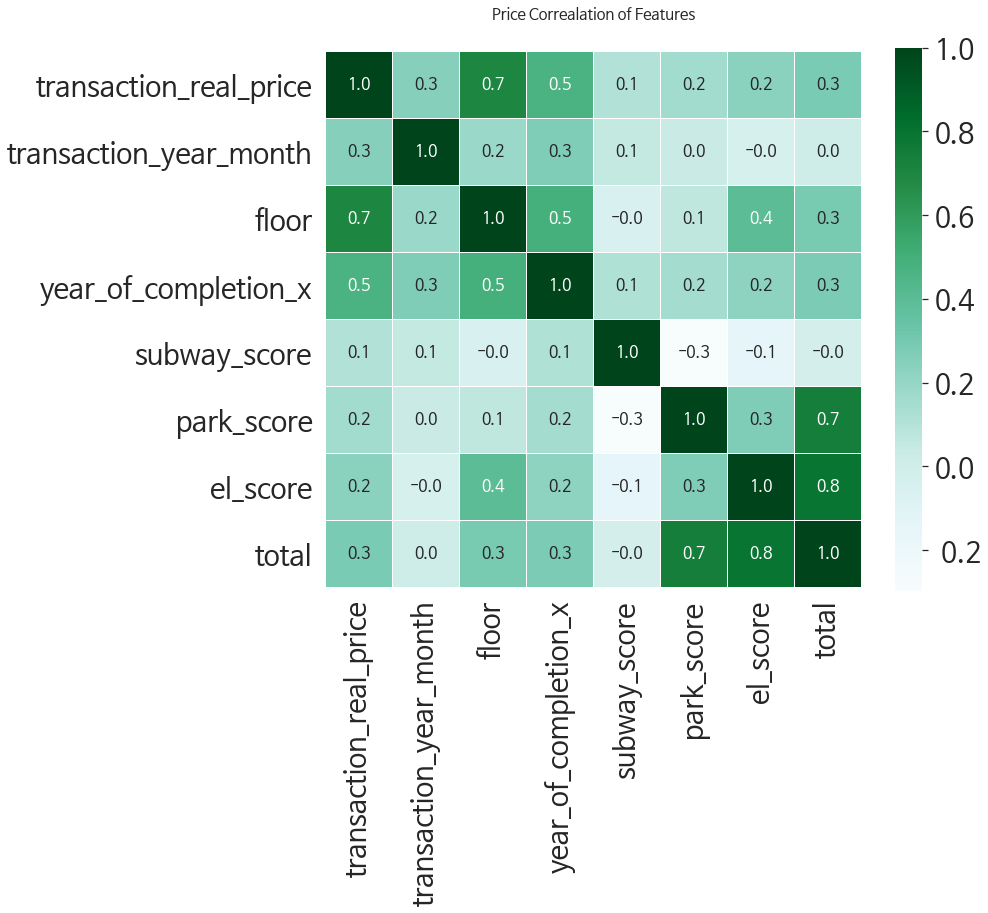

In [138]:
# 해운대구 대형 아파트 상관분석
heatmap_data = df_result3[(df_result3.gu_y == '해운대구')& (df_result3['size'] == 4)][['transaction_real_price', 'transaction_year_month', 'floor', 'year_of_completion_x', 'subway_score', 'park_score','el_score', 'total']]
colormap = plt.cm.BuGn
plt.figure(figsize = (12, 10))
plt.title('Price Correalation of Features', y=1.05 , size = 15)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1 , vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True , annot_kws={'size': 16}, fmt='.1f')
plt.show()
# 해운대구 대형아파트는 점수에 높음에 따라 가격이 높은 경향이 있음.
# 기장군은 중소형아파트에 점수가 높음에 따라 가격이 높은 경향이 있다.
# 동구는 중형아파트가 점수가 높음에 따라 가격이 낮은 경향이 있다.
# 남구의 대형아파트는 점수가 높을수록 가격이 낮다

<Figure size 864x504 with 0 Axes>

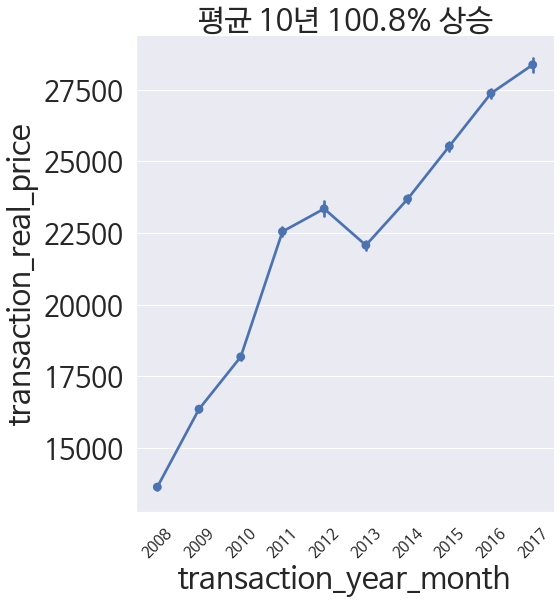

<Figure size 864x504 with 0 Axes>

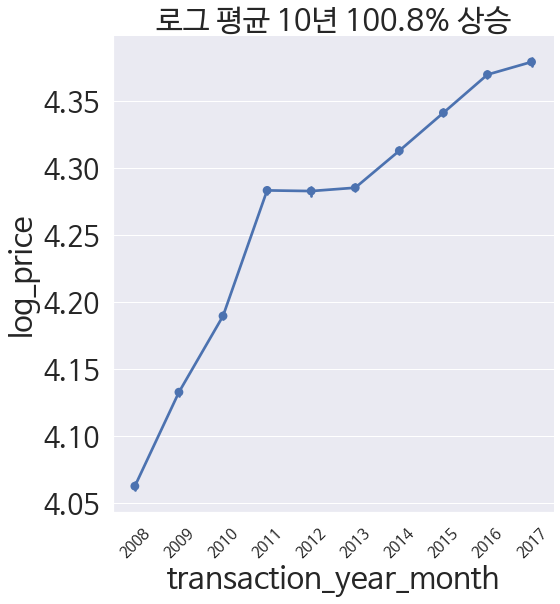

In [139]:
# 10년 평균 상승률, 
plt.figure(figsize=(12,7))
ax = sns.factorplot('transaction_year_month', 'transaction_real_price', data= df_result3, size=8, aspect=1)
# plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_xticklabels(size = 15, rotation= 45)
plt.title('평균 10년 100.8% 상승', y=1.05 , size = 30)
plt.show()
plt.figure(figsize=(12,7))
ax = sns.factorplot('transaction_year_month', 'log_price', data= df_result3, size=8, aspect=1)
# plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_xticklabels(size = 15, rotation= 45)
plt.title('로그 평균 10년 100.8% 상승', y=1.05 , size = 30)
plt.show()

In [141]:
for i in range(2008,2018):
  print(df_result3[df_result3['transaction_year_month']== i]['transaction_real_price'].sum() /df_result3[df_result3['transaction_year_month']==i].shape[0])
  print(i)

13633.424494692454
2008
16351.449462843184
2009
18174.605434445708
2010
22544.77367820464
2011
23341.75297494781
2012
22068.103438426107
2013
23678.528618354117
2014
25521.561518950995
2015
27368.587928289973
2016
28364.662748563853
2017


In [142]:
28364.662748563853/23341.75297494781

1.2151899122146919

In [143]:
#모든 아파트는 시간에 지남에 따라 상승한다. 유의미한 변수를 가진 특정구에서 
# 2013년 을 기준으로  2017년에 평균 상승률(21.5%) 보다 높이 올라가는 아파트 예측

#10년동안 평균 100% 상승했는데 100%이상 상승할 아파트를 예측 


#
df_result3

,apartment_id,dong,year_of_completion_x,transaction_year_month,floor,transaction_real_price,apt_size,gu_x,apt_y,gu_y,el_score,subway_score,park_score,total,size,log_price,dong_x
0,12254,지사동,2015,2016,3,16897,M_S,0,협성DS엘리시안아파트,강서구,0.0,0.0,0.0,0.0,1,4.227810,NaN
1,12254,지사동,2015,2016,2,19000,M,0,협성DS엘리시안아파트,강서구,0.0,0.0,0.0,0.0,2,4.278754,NaN
2,12254,지사동,2015,2016,7,17600,M_S,0,협성DS엘리시안아파트,강서구,0.0,0.0,0.0,0.0,1,4.245513,NaN
3,12254,지사동,2015,2016,22,21200,M,0,협성DS엘리시안아파트,강서구,0.0,0.0,0.0,0.0,2,4.326336,NaN
4,12254,지사동,2015,2016,3,17043,M_S,0,협성DS엘리시안아파트,강서구,0.0,0.0,0.0,0.0,1,4.231546,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315472,11105,반송동,1984,2010,3,4900,M_S,15,풍전아파트,해운대구,1.0,0.0,1.0,2.0,1,3.690196,6.0
315473,11105,반송동,1984,2009,1,4000,M_S,15,풍전아파트,해운대구,1.0,0.0,1.0,2.0,1,3.602060,6.0
315474,11105,반송동,1984,2011,1,6500,M_S,15,풍전아파트,해운대구,1.0,0.0,1.0,2.0,1,3.812913,6.0
315475,11105,반송동,1984,2011,2,6300,M_S,15,풍전아파트,해운대구,1.0,0.0,1.0,2.0,1,3.799341,6.0


In [144]:
# 동일한 이름, 같은 사이즈 ,아파트 가격#
# 2017년도의 각 아파트의 상승률을 구해서 100% 이상인 것만 1 아니면 0

df_result3[(df_result3['transaction_year_month']== 2017)&(df_result3['apt_y'] == '이진아파트')&(df_result3['size'] == 2)].transaction_real_price.sum()/df_result3[(df_result3['transaction_year_month']== 2017)&(df_result3['apt_y'] == '이진아파트')&(df_result3['size'] == 2)].transaction_real_price.shape[0]




20262.5

In [145]:
df_result3[(df_result3['transaction_year_month']== 2008)&(df_result3['apt_y'] == '이진아파트')&(df_result3['size'] == 2)].transaction_real_price.sum()/df_result3[(df_result3['transaction_year_month']== 2008)&(df_result3['apt_y'] == '이진아파트')&(df_result3['size'] == 2)].transaction_real_price.shape[0]

12100.0

In [146]:
def percent(a,b,c,d):
  x = df_result3[(df_result3['transaction_year_month']== a)&(df_result3['apt_y'] == b)&(df_result3['size'] == c)].transaction_real_price.sum() / df_result3[(df_result3['transaction_year_month']== a)&(df_result3['apt_y'] == b)&(df_result3['size'] == c)].transaction_real_price.shape[0]
  y = df_result3[(df_result3['transaction_year_month']== d)&(df_result3['apt_y'] == b)&(df_result3['size'] == c)].transaction_real_price.sum() / df_result3[(df_result3['transaction_year_month']== d)&(df_result3['apt_y'] == b)&(df_result3['size'] == c)].transaction_real_price.shape[0]

  z = ((x/y)-1)
  if z > 1:
    return 1
  else:
    return 0
  # return z, x, y

In [147]:
percent(2017, '이진아파트', 2,  2008)

0

In [148]:
test = []

for i in tqdm(df_result3['apt_y'].unique()):
  for j in df_result3[df_result3['apt_y']== i]['size'].unique():
    test.append([i,j,percent(df_result3[df_result3['apt_y']== i]['transaction_year_month'].sort_values().values[-1], i, j, df_result3[df_result3['apt_y']== i]['transaction_year_month'].sort_values().values[0])])
  # break

100%|██████████| 2711/2711 [09:59<00:00,  4.52it/s]


In [149]:
df_result3[(df_result3['transaction_year_month']== 2008)&(df_result3['apt_y'] == '이진아파트')&(df_result3['size'] == 1)]

,apartment_id,dong,year_of_completion_x,transaction_year_month,floor,transaction_real_price,apt_size,gu_x,apt_y,gu_y,el_score,subway_score,park_score,total,size,log_price,dong_x
315337,9243,반송동,1998,2008,17,8000,M_S,15,이진아파트,해운대구,0.0,0.0,1.0,1.0,1,3.903090,6.0
315346,9243,반송동,1998,2008,3,7600,M_S,15,이진아파트,해운대구,0.0,0.0,1.0,1.0,1,3.880814,6.0
315347,9243,반송동,1998,2008,16,7900,M_S,15,이진아파트,해운대구,0.0,0.0,1.0,1.0,1,3.897627,6.0
315395,9243,반송동,1998,2008,8,7950,M_S,15,이진아파트,해운대구,0.0,0.0,1.0,1.0,1,3.900367,6.0
315396,9243,반송동,1998,2008,1,7500,M_S,15,이진아파트,해운대구,0.0,0.0,1.0,1.0,1,3.875061,6.0
315435,9243,반송동,1998,2008,13,7600,M_S,15,이진아파트,해운대구,0.0,0.0,1.0,1.0,1,3.880814,6.0


In [150]:
df_result3[df_result3['apt_y']== '협성DS엘리시안아파트']['size'].unique()

array([1, 2])

In [151]:
df_result3[df_result3['apt_y']== '이진아파트']['transaction_year_month'].sort_values().values[0]

2008

In [152]:
train = pd.DataFrame(test)

955

955

In [153]:
# 10년간 100%가 넘는 아파트는 21% 이다.


In [154]:
train.columns = ['apt_y', 'size', 'test']

In [155]:
train

,apt_y,size,test
0,협성DS엘리시안아파트,1,0
1,협성DS엘리시안아파트,2,0
2,지사과학단지삼정그린코아아파트,2,0
3,지사과학단지삼정그린코아아파트,1,0
4,금강펜테리움아파트,1,0
...,...,...,...
4527,이진아파트,1,1
4528,이진아파트,2,0
4529,민화그린빌라,1,0
4530,풍전아파트,1,0


In [156]:
train2 = pd.merge(df_result2 , train, on = ['apt_y', 'size'], how = 'left')


In [157]:
tmp =[]
for i in tqdm(train2['apt_y'].unique()):
  for j in train2[(train2['apt_y']== i)&(train2['transaction_year_month'] == train2[train2['apt_y']== i]['transaction_year_month'].sort_values().values[0])]['size'].unique():
    tmp1 = (train2[(train2['apt_y']== i)&(train2['transaction_year_month'] == train2[train2['apt_y']== i]['transaction_year_month'].sort_values().values[0])&(train2['size']== j)])
    tmp.append(pd.pivot_table(tmp1, index=['transaction_year_month'], aggfunc='mean'))
  #   print(i,j)
  # break

100%|██████████| 2711/2711 [05:05<00:00,  8.88it/s]


In [158]:
train2[(train2['apt_y']== '협성DS엘리시안아파트')&(train2['transaction_year_month'] == 2008)&(train2['size'] == 6)]

,apartment_id,dong,year_of_completion_x,transaction_year_month,floor,transaction_real_price,apt_size,gu_x,apt_y,gu_y,el_score,subway_score,park_score,total,size,log_price,test


In [159]:
# pd.pivot_table(tmp[1], index=['transaction_year_month'], aggfunc='mean')
# tmp

[                        apartment_id  ...  year_of_completion_x
 transaction_year_month                ...                      
 2015                           12254  ...                  2015
 
 [1 rows x 12 columns],
                         apartment_id  ...  year_of_completion_x
 transaction_year_month                ...                      
 2015                           12254  ...                  2015
 
 [1 rows x 12 columns],
                         apartment_id  ...  year_of_completion_x
 transaction_year_month                ...                      
 2017                            9970  ...                  2017
 
 [1 rows x 12 columns],
                         apartment_id  ...  year_of_completion_x
 transaction_year_month                ...                      
 2017                            9970  ...                  2017
 
 [1 rows x 12 columns],
                         apartment_id  ...  year_of_completion_x
 transaction_year_month                ...         

In [160]:
train2[(train2['apt_y']== '이진아파트')&(train2['transaction_year_month'] == 2008)]['size'].unique()

array([1, 2])

In [161]:
train2[train2['transaction_year_month'] == 2017]['apt_y'].value_counts()

개금주공2단지아파트        383
다대롯데캐슬몰운대아파트      204
삼익비치타운아파트         185
해운대두산위브더제니스아파트    156
사직쌍용예가1차아파트       151
                 ... 
개금블루스카이             1
반도맨션                1
삼안리젠시6차아파트          1
남산두맨션               1
정목까사아파트             1
Name: apt_y, Length: 1616, dtype: int64

In [162]:
train_all = pd.concat(tmp[:])

In [163]:
train_all = train_all.reset_index()

In [164]:
train_all

,transaction_year_month,apartment_id,el_score,floor,gu_x,log_price,park_score,size,subway_score,test,total,transaction_real_price,year_of_completion_x
0,2015,12254,0.0,13.750000,0,4.238867,0.0,1,0.0,0,0.0,17335.416667,2015.0
1,2015,12254,0.0,12.833333,0,4.315737,0.0,2,0.0,0,0.0,20756.666667,2015.0
2,2017,9970,0.0,12.733333,0,4.288844,0.0,2,0.0,0,0.0,19487.333333,2017.0
3,2017,9970,0.0,14.631579,0,4.231427,0.0,1,0.0,0,0.0,17052.105263,2017.0
4,2013,9971,0.0,7.000000,0,4.190029,0.0,1,0.0,0,0.0,15495.000000,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,2008,5847,0.0,2.888889,15,3.717045,0.0,1,0.0,0,0.0,5238.888889,1990.0
3869,2008,9243,0.0,9.666667,15,3.889629,1.0,1,0.0,1,1.0,7758.333333,1998.0
3870,2008,9243,0.0,12.500000,15,4.082661,1.0,2,0.0,0,1.0,12100.000000,1998.0
3871,2008,4646,0.0,4.000000,15,3.531479,0.0,1,0.0,0,0.0,3400.000000,1992.0


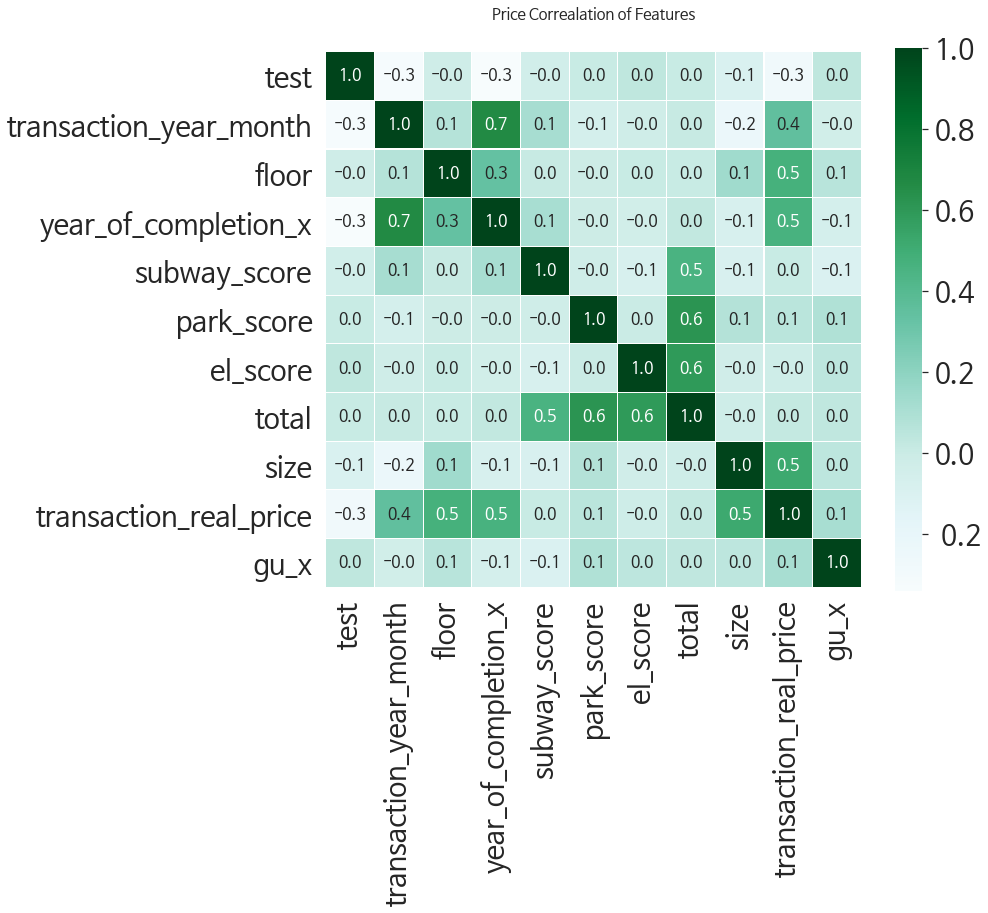

In [165]:
# 가격 상승률 아파트 상관분석
heatmap_data = train_all[['test', 'transaction_year_month', 'floor', 'year_of_completion_x', 'subway_score', 'park_score','el_score', 'total','size','transaction_real_price','gu_x']]
colormap = plt.cm.BuGn
plt.figure(figsize = (12, 10))
plt.title('Price Correalation of Features', y=1.05 , size = 15)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1 , vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True , annot_kws={'size': 16}, fmt='.1f')
plt.show()



In [166]:
df_train = pd.get_dummies(train_all, columns = ['gu_x'], prefix = 'gu_x')

In [167]:
df_train

,transaction_year_month,apartment_id,el_score,floor,log_price,park_score,size,subway_score,test,total,transaction_real_price,year_of_completion_x,gu_x_0,gu_x_1,gu_x_2,gu_x_3,gu_x_4,gu_x_5,gu_x_6,gu_x_7,gu_x_8,gu_x_9,gu_x_10,gu_x_11,gu_x_12,gu_x_13,gu_x_14,gu_x_15
0,2015,12254,0.0,13.750000,4.238867,0.0,1,0.0,0,0.0,17335.416667,2015.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,12254,0.0,12.833333,4.315737,0.0,2,0.0,0,0.0,20756.666667,2015.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,9970,0.0,12.733333,4.288844,0.0,2,0.0,0,0.0,19487.333333,2017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,9970,0.0,14.631579,4.231427,0.0,1,0.0,0,0.0,17052.105263,2017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,9971,0.0,7.000000,4.190029,0.0,1,0.0,0,0.0,15495.000000,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,2008,5847,0.0,2.888889,3.717045,0.0,1,0.0,0,0.0,5238.888889,1990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3869,2008,9243,0.0,9.666667,3.889629,1.0,1,0.0,1,1.0,7758.333333,1998.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3870,2008,9243,0.0,12.500000,4.082661,1.0,2,0.0,0,1.0,12100.000000,1998.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3871,2008,4646,0.0,4.000000,3.531479,0.0,1,0.0,0,0.0,3400.000000,1992.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [168]:
df_train.drop(['apartment_id', 'log_price'], axis = 1, inplace = True)
df_test = df_train.drop(['test'], axis = 1)

In [169]:
df_train.head()

,transaction_year_month,el_score,floor,park_score,size,subway_score,test,total,transaction_real_price,year_of_completion_x,gu_x_0,gu_x_1,gu_x_2,gu_x_3,gu_x_4,gu_x_5,gu_x_6,gu_x_7,gu_x_8,gu_x_9,gu_x_10,gu_x_11,gu_x_12,gu_x_13,gu_x_14,gu_x_15
0,2015,0.0,13.750000,0.0,1,0.0,0,0.0,17335.416667,2015.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,0.0,12.833333,0.0,2,0.0,0,0.0,20756.666667,2015.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,0.0,12.733333,0.0,2,0.0,0,0.0,19487.333333,2017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,0.0,14.631579,0.0,1,0.0,0,0.0,17052.105263,2017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,0.0,7.000000,0.0,1,0.0,0,0.0,15495.000000,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
# 학습용 데이터를  독립변수 와 종속변수로  분리
X_train = df_train.drop('test', axis =1 ).values
target_label = df_train['test'].values

In [171]:
# 학습데이터와 테스트 데이터로 분리시킴
X_tr, X_vid, y_tr, y_vid =  train_test_split(X_train, target_label, test_size = 0.25, random_state = 2013)

In [172]:
#랜덤포레스트 예측모델 사용
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
# 학습 데이터로 추출
prediction = model.predict(X_vid)


In [179]:
print(f'총 {y_vid.shape[0]}아파트 중 {100*metrics.accuracy_score(prediction, y_vid):.1f}% 정확도로 아파트가격이 평균이상 상승한것을 예측')

총 969아파트 중 80.0% 정확도로 아파트가격이 평균이상 상승한것을 예측


In [175]:
#feature_importance 모델학습시킨  변수의 비중 체크
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

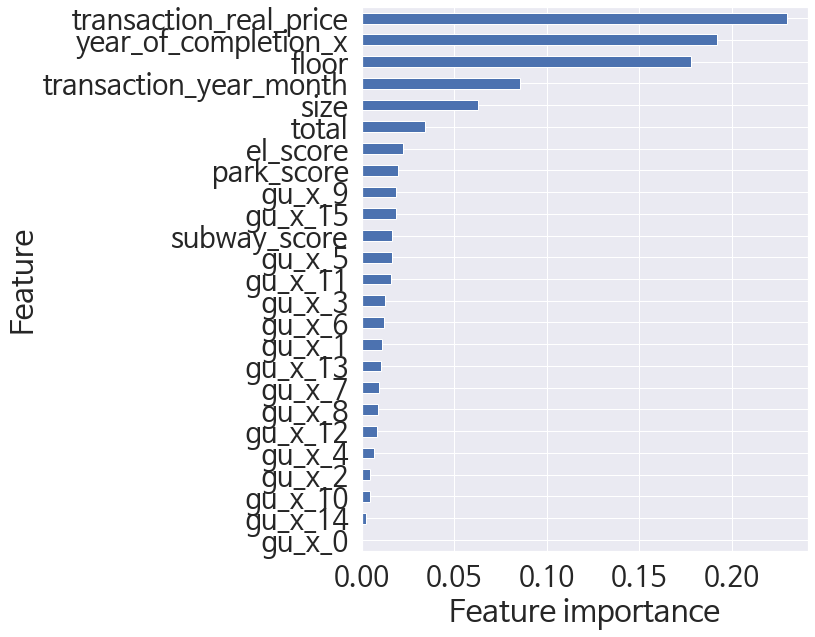

In [176]:
plt.figure(figsize = (8,10))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# 실거래가 , 완공년도, 층수를 비중을 크게 보며 실거래년도, 아파트 사이즈, 스코어, 순으로 중요성을 보여준다
# 9, 15 사하구와 해운대구에 중요도를 더 높게 주어 아파트가격상승률이 높다는 예측

In [177]:
pd.DataFrame(prediction)[0].sum()


180

In [178]:
pd.DataFrame(y_vid).sum()

0    242
dtype: int64